
# 🌼 자연어처리 기초 - 1차시(24.11.08)

---


## 1. 텍스트 전처리
1. 정규화 : 대소문자 통일, 용어 통일, 특수문자 제거, 정규표현식
2. 어간추출 / 표제어추출 : 단어에서 접사 제거하여 기본 형태 찾아내기, 사전에 기반하여 단어를 원형으로 변환하기
3. 불용어 제거 : 불용어 목록 정의하고 필터링
4. 토큰화 : 의미를 갖는 최소한의 단위로 나누기

In [1]:
text = 'Today is an exciting Friday'
lower_text = text.lower()
lower_text

'today is an exciting friday'

In [2]:
text2 = 'The weekend is short, only two days long.'
upper_text = text2.upper()
upper_text

'THE WEEKEND IS SHORT, ONLY TWO DAYS LONG.'

In [3]:
import re

text3 = '스마트폰은 핸드폰, 휴대폰 이라고도 할 수 있어요'
nomalized = re.sub(r'(핸드폰|휴대폰)', '스마트폰', text3)
nomalized

'스마트폰은 스마트폰, 스마트폰 이라고도 할 수 있어요'

|구성 요소|설명|예시|
|---|---|---|
|특수 문자|특정 패턴에 매칭하는 메타 문자|
|.	|임의의 한 문자와 매칭 (줄 바꿈 제외)|	a.b → "a와 b 사이에 아무 문자"|
|*	|앞에 있는 문자가 0번 이상 반복됨|	ab* → "a + 0개 이상의 b"|
|+	|앞에 있는 문자가 1번 이상 반복됨|	ab+ → "a + 1개 이상의 b"|
|?	|앞에 있는 문자가 0번 또는 1번 나타남|	ab? → "a + 0개 또는 1개의 b"|
|문자 클래스	|대괄호 안의 문자 중 하나와 매칭	|
|[abc]	|"a", "b", "c" 중 하나와 매칭	|[abc] → "a, b, 또는 c"|
|[a-z]	|소문자 알파벳 a부터 z까지의 문자 중 하나와 매칭	|[a-z] → "모든 소문자"|
|이스케이프 시퀀스	|특정 문자 그룹과 매칭	|
|\d|	숫자 (0-9)와 매칭	|\d+ → "1개 이상의 숫자"|
|\s	|공백 문자 (스페이스, 탭 등)와 매칭|	\s+ → "1개 이상의 공백"|
|\w	|알파벳, 숫자, 밑줄(_)과 매칭	|\w+ → "1개 이상의 단어 문자"|
|그룹화	|패턴을 그룹으로 묶어 매칭 및 캡처	|
|()	|괄호 안의 패턴을 그룹화하여 캡처 가능	|(\d{3})-(\d{4}) → 전화번호 패턴|

In [4]:
text4 = "안녕하세요!!! 오늘 점심은 무엇을 먹을까요? @김수빈 #Python #AI 8"
nomalized2 = re.sub(r'[^가-힣a-zA-Z0-9\s]','', text4)
nomalized2

'안녕하세요 오늘 점심은 무엇을 먹을까요 김수빈 Python AI 8'

In [5]:
text5 = "문의는 soocong@chunjae.co.kr 으로 보내주세요. 더 많은 정보는 https://chatgpt.com/ 에서 확인하세요."
without_email = re.sub(r'\S+@\S+','',text5)
without_email

'문의는  으로 보내주세요. 더 많은 정보는 https://chatgpt.com/ 에서 확인하세요.'

In [6]:
without_url = re.sub(r'http[s]?://\S+', '', without_email)
without_url

'문의는  으로 보내주세요. 더 많은 정보는  에서 확인하세요.'

In [7]:
# !pip install nltk

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RMARKET\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
word = ['running', 'jumps', 'studies']

In [10]:
stems = []
for wor in word:
    stems.append(stemmer.stem(wor))

stems

['run', 'jump', 'studi']

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = ['running', 'jumps', 'studies']

In [12]:
lemmas = []
for word in words:
    lemma = lemmatizer.lemmatize(word, pos='v')
    lemmas.append(lemma)

lemmas

['run', 'jump', 'study']

In [13]:
# pip install konlpy

In [14]:
from konlpy.tag import Okt

In [15]:
okt = Okt()
text = '달리고 있는 사람들을 보았다'

In [16]:
stems = okt.morphs(text)
stems

['달리', '고', '있는', '사람', '들', '을', '보았다']

In [17]:
stems = okt.morphs(text, stem=True)
stems

['달리', '고', '있다', '사람', '들', '을', '보다']

In [18]:
lemmas = []
for word, tag in okt.pos(text):
    lemmas.append((word, tag))

lemmas

[('달리', 'Noun'),
 ('고', 'Josa'),
 ('있는', 'Adjective'),
 ('사람', 'Noun'),
 ('들', 'Suffix'),
 ('을', 'Josa'),
 ('보았다', 'Verb')]

In [19]:
# 불용어 제거
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RMARKET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
text = '이 문장에서 불용어라는 단어를 불용어로 처리합니다.'
text.replace('불용어', '')

'이 문장에서 라는 단어를 로 처리합니다.'

In [21]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [22]:
words = ['This', 'is', 'a', 'simple', 'example']
filtered = []

In [23]:
for word in words:
    if word.lower() not in stop_words:
        filtered.append(word)
filtered

['simple', 'example']

In [24]:
text = '불용어 예시를 실행해봅니다.'
stop_words = {'불', '를'}

In [25]:
words = okt.morphs(text)
filtered_ko = []
for word in words:
    if word not in stop_words:
        filtered_ko.append(word)

filtered_ko

['용어', '예시', '실행', '해봅니다', '.']

## 2-1. 토큰화 (영어)
1. word_tokenize
2. TfidfVectorizer

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RMARKET\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
nltk.__version__

'3.9.1'

In [28]:
# nltk.download()

In [29]:
from nltk.tokenize import word_tokenize
text = "It's difficult to create English sentence examples"

In [30]:
tokens = word_tokenize(text)
tokens

['It', "'s", 'difficult', 'to', 'create', 'English', 'sentence', 'examples']

## 2-2. 토큰화 (한국어)
1. okt
2. hannanum
3. kkma

In [31]:
# pip install konlpy

In [32]:
import konlpy
from konlpy.tag import Okt, Hannanum, Kkma

In [33]:
okt = Okt() 
hannanum = Hannanum() 
kkma = Kkma() 

In [34]:
text = "아버지가방에들어가신다." 
text2 = "저기저뜀틀이내가뛸뜀틀인가내가안뛸뜀틀인가"

In [35]:
print(f'okt 형태소 추출 : {okt.morphs(text)}')
print(f'hannanum 형태소 추출 : {hannanum.morphs(text)}')
print(f'kkma 형태소 추출 : {kkma.morphs(text)}')

okt 형태소 추출 : ['아버지', '가방', '에', '들어가신다', '.']
hannanum 형태소 추출 : ['아버지가방에들어가', '이', '시ㄴ다', '.']
kkma 형태소 추출 : ['아버지', '가방', '에', '들어가', '시', 'ㄴ다', '.']


In [36]:
print(f'okt 형태소 추출 : {okt.morphs(text2)}')
print(f'hannanum 형태소 추출 : {hannanum.morphs(text2)}')
print(f'kkma 형태소 추출 : {kkma.morphs(text2)}')

okt 형태소 추출 : ['저', '기', '저', '뜀틀', '이내', '가', '뛸', '뜀틀', '인가', '내', '가안', '뛸', '뜀틀', '인가']
hannanum 형태소 추출 : ['저기저뜀틀이내가뛸뜀틀인가내가안뛸뜀틀', '인가']
kkma 형태소 추출 : ['저', '기저', '뜀틀', '이내', '가', '뛰', 'ㄹ', '뜀틀', '이', 'ㄴ가', '내가', '안', '뛰', 'ㄹ', '뜀틀', '이', 'ㄴ가']


In [37]:
print(f'okt 명사 추출 : {okt.nouns(text)}')
print(f'hannanum 명사 추출 : {hannanum.nouns(text)}')
print(f'kkma 명사 추출 : {kkma.nouns(text)}')

okt 명사 추출 : ['아버지', '가방']
hannanum 명사 추출 : ['아버지가방에들어가']
kkma 명사 추출 : ['아버지', '아버지가방', '가방']


In [38]:
print(f'okt 명사 추출 : {okt.nouns(text2)}')
print(f'hannanum 명사 추출 : {hannanum.nouns(text2)}')
print(f'kkma 명사 추출 : {kkma.nouns(text2)}')

okt 명사 추출 : ['뜀틀', '이내', '뜀틀', '가안', '뜀틀']
hannanum 명사 추출 : ['저기저뜀틀이내가뛸뜀틀인가내가안뛸뜀틀']
kkma 명사 추출 : ['뜀틀', '내가', '뜀틀이내', '기저', '이내']


### Mecab
- 형태소분석기 성능 중 가장 빠르고 성능이 좋은 편으로 유명한 한국어 자연어 처리 모델
- mecab-ko-dic : https://github.com/Pusnow/mecab-ko-dic-msvc/releases/tag/mecab-ko-dic-2.1.1-20180720-msvc
- mecab-ko-msvc :https://github.com/Pusnow/mecab-ko-msvc/releases/tag/release-0.9.2-msvc-3
- C드라이브 바로 아래에 mecab이라는 폴더 생성 후 mecab-ko-dic, mecab-ko-msvc 파일 언패킹
- 
- https://github.com/Pusnow/mecab-python-msvc/releases
- 비트에 맞는 python wheel 설치 후 anaconda3 > envs > 가상환경 > Lib > site-packages 폴더로 이동
- python version 3.9인 가상환경 실행 (Anaconda Prompt)
- 실행 후 wheel을 설치한 경로로 이동하여 pip install mecab-python3 실행
- `커널 restart 후 코드 실행`


In [82]:
from konlpy.tag import Mecab

m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')
m.nouns('한국어자연어처리')

['한국어', '자연어', '처리']

In [40]:
text = "아버지가방에들어가신다." 
text2 = "저기저뜀틀이내가뛸뜀틀인가내가안뛸뜀틀인가"

In [41]:
m.morphs(text2)

['저기',
 '저',
 '뜀틀',
 '이',
 '내',
 '가',
 '뛸',
 '뜀틀',
 '인가',
 '내',
 '가',
 '안',
 '뛸',
 '뜀틀',
 '인가']

## 3. 텍스트 벡터화
1. Bag-of-Words
2. TF-IDF

In [42]:
def bag_of_words(text):
    okt = Okt()
    text = text.replace('.', '')
    tokens = okt.morphs(text)
    word_dict = {}
    bow = []

    for token in tokens:
        if token not in word_dict:
            word_dict[token] = len(word_dict)
            # 인덱스 부여
            bow.append(1)
        else:
            index = word_dict[token]
            bow[index] += 1
    return word_dict, bow

In [43]:
doc = '반복되는 단어는 단어 개수만큼 추가됩니다.'

In [44]:
word_dict, bow = bag_of_words(doc)
print(bow)
print(word_dict)

[1, 1, 2, 1, 1, 1, 1, 1]
{'반복': 0, '되는': 1, '단어': 2, '는': 3, '개수': 4, '만큼': 5, '추가': 6, '됩니다': 7}


In [45]:
doc = '그룹 에스파 카리나가 미모를 뽐냈다. 카리나는 7일 자신의 인스타그램에 “우울할 땐 이 포즈를 해봐”라는 글과 사진을 게재했다.'
word_dict, bow = bag_of_words(doc)
print(bow)
print(word_dict)

[1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{'그룹': 0, '에스': 1, '파': 2, '카리나': 3, '가': 4, '미모': 5, '를': 6, '뽐냈다': 7, '는': 8, '7일': 9, '자신': 10, '의': 11, '인스타그램': 12, '에': 13, '“': 14, '우울할': 15, '땐': 16, '이': 17, '포즈': 18, '해봐': 19, '”': 20, '라는': 21, '글': 22, '과': 23, '사진': 24, '을': 25, '게재': 26, '했다': 27}


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
corpus = ['반복되는 단어는 단어 개수만큼 추가됩니다.']
vector = CountVectorizer()
print(f'벡터화된 문장 : {vector.fit_transform(corpus).toarray()}')
print(f'단어 사전 : {vector.vocabulary_}')

벡터화된 문장 : [[1 1 1 1 1]]
단어 사전 : {'반복되는': 3, '단어는': 2, '단어': 1, '개수만큼': 0, '추가됩니다': 4}


In [48]:
text = ['BOW works the same for English.']
vect = CountVectorizer(stop_words=['the', 'bow'])
print(f'벡터화된 문장 : {vect.fit_transform(text).toarray()}')
print(f'단어 사전 : {vect.vocabulary_}')

벡터화된 문장 : [[1 1 1 1]]
단어 사전 : {'works': 3, 'same': 2, 'for': 1, 'english': 0}


In [49]:
vect = CountVectorizer(stop_words='english')
print(f'벡터화된 문장 : {vect.fit_transform(text).toarray()}')
print(f'단어 사전 : {vect.vocabulary_}')

벡터화된 문장 : [[1 1 1]]
단어 사전 : {'bow': 0, 'works': 2, 'english': 1}


In [50]:
import pandas as pd
from math import log
# DTM : 문서 단어 행렬 (Document Term Matrix)

docs = [
  '원숭이 엉덩이는 빨개',
  '빨간건 사과',
  '사과는 맛있어',
  '맛있으면 바나나'
]

In [51]:
vocab = []
for doc in docs:
    words = doc.split()
    for w in words:
        if w not in vocab:
            vocab.append(w)

vocab.sort()
vocab

['맛있어', '맛있으면', '바나나', '빨간건', '빨개', '사과', '사과는', '엉덩이는', '원숭이']

In [52]:
N = len(docs)
N

4

In [53]:
N = len(docs)
def tf(t, d):
    return d.count(t)
# TF : 특정 문서 d에서 특정 단어 t의 등장 횟수

In [54]:
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

In [55]:
def tfidf(t, d):
    return tf(t,d) * idf(t)

In [56]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]

    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,맛있어,맛있으면,바나나,빨간건,빨개,사과,사과는,엉덩이는,원숭이
0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,1,1,0,0
3,0,1,1,0,0,0,0,0,0


In [57]:
vocab

['맛있어', '맛있으면', '바나나', '빨간건', '빨개', '사과', '사과는', '엉덩이는', '원숭이']

In [58]:
result2 = []
for i in range(len(vocab)):
    t = vocab[i]
    result2.append(idf(t))

In [59]:
idf_ = pd.DataFrame(result2, index=vocab, columns=['IDF'])
idf_

,IDF
맛있어,0.693147
맛있으면,0.693147
바나나,0.693147
빨간건,0.693147
빨개,0.693147
사과,0.287682
사과는,0.693147
엉덩이는,0.693147
원숭이,0.693147


In [60]:
result3 =[]
for i in range(N):
    result3.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result3[-1].append(tfidf(t, d))

In [61]:
tfidf_ = pd.DataFrame(result3, columns=vocab)
tfidf_

,맛있어,맛있으면,바나나,빨간건,빨개,사과,사과는,엉덩이는,원숭이
0,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.693147
1,0.000000,0.000000,0.000000,0.693147,0.000000,0.287682,0.000000,0.000000,0.000000
2,0.693147,0.000000,0.000000,0.000000,0.000000,0.287682,0.693147,0.000000,0.000000
3,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [62]:
# 사이킷런을 통한 TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
# 사실 이거 쓰면 짱빨리됨ㅎㅎ

docs = [
  '원숭이 엉덩이는 빨개',
  '빨간건 사과',
  '사과는 맛있어',
  '맛있으면 바나나'
]

In [63]:
vector = CountVectorizer()
vector.fit_transform(docs).toarray()

array([[0, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.57735027, 0.57735027],
       [0.        , 0.        , 0.        , 0.70710678, 0.        ,
        0.70710678, 0.        , 0.        , 0.        ],
       [0.70710678, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        ],
       [0.        , 0.70710678, 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [65]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vocab)
df_tfidf

,맛있어,맛있으면,바나나,빨간건,빨개,사과,사과는,엉덩이는,원숭이
0,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.57735,0.57735
1,0.000000,0.000000,0.000000,0.707107,0.00000,0.707107,0.000000,0.00000,0.00000
2,0.707107,0.000000,0.000000,0.000000,0.00000,0.000000,0.707107,0.00000,0.00000
3,0.000000,0.707107,0.707107,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000


## 4. 텍스트 임베딩 (Word2Vec)
1. CBOW
2. Skip-gram

In [66]:
# 넘파이 지우기 pip uninstall numpy
# 넘파이 재설치하기 pip install numpy==1.24.4
# gensim 설치하기 pip install gensim==3.4.0
# scipy 지우기 pip uninstall scipy
# scipy 설치하기 pip install scipy==1.9.3

In [67]:
from gensim.models import Word2Vec

sentences = [
    ['the', 'cat', 'is', 'on', 'the', 'mat'],
    ['dogs', 'are', 'in', 'the', 'garden'],
    ['we', 'love', 'playing', 'with', 'our', 'pets']
]

In [68]:
# 다 설치하고 업데이트!!!
# !pip install --upgrade gensim

In [69]:
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg = 0)
cbow_model.wv.most_similar('cat')

[('with', 0.17826786637306213),
 ('pets', 0.16072483360767365),
 ('garden', 0.10560770332813263),
 ('on', 0.09215974807739258),
 ('is', 0.027008360251784325),
 ('we', 0.00773055013269186),
 ('the', -0.037719566375017166),
 ('are', -0.045522745698690414),
 ('dogs', -0.04649786278605461),
 ('mat', -0.05902623012661934)]

In [70]:
skip_gram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg = 1)
skip_gram_model.wv.most_similar('cat')

[('with', 0.17826786637306213),
 ('pets', 0.16072483360767365),
 ('garden', 0.10560770332813263),
 ('on', 0.09215974807739258),
 ('is', 0.027008360251784325),
 ('we', 0.00773055013269186),
 ('the', -0.037719566375017166),
 ('are', -0.045522745698690414),
 ('dogs', -0.04649786278605461),
 ('mat', -0.05902623012661934)]


## 🌼마무리 문제

아래 문제들을 풀어보세요!

Q1. 음식점 리뷰 데이터를 다운로드받고 불러오세요!

In [71]:
# pip install kagglehub

In [72]:
# pip install kaggle

In [73]:
# 캐글에서 데이터 다운로드
import kagglehub
path = kagglehub.dataset_download("ninetyninenewton/kr3-korean-restaurant-reviews-with-ratings")

print("설치 파일 경로:", path)

c:\Users\RMARKET\anaconda3\envs\test_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


설치 파일 경로: C:\Users\RMARKET\.cache\kagglehub\datasets\ninetyninenewton\kr3-korean-restaurant-reviews-with-ratings\versions\1


In [75]:
# 다운받은 경로에 접근하여 csv로 읽어오기
import pandas as pd
df = pd.read_csv('C:/Users/RMARKET/.cache/kagglehub/datasets/ninetyninenewton/kr3-korean-restaurant-reviews-with-ratings/versions/1/kr3.tsv', sep='\t', encoding='utf-8')
restaurants = df.sample(n=1000, random_state=42)
# 데이터가 너무 커요~ 랜덤으로 1000개정도만 가져와봅시다
restaurants

,Rating,Review
124388,1,삼겹만 먹다가 목살 먹었어요 냉면에 역시 저기압일 땐 고기 앞으로 가야쥬 잘 먹...
633594,2,가볼만해요 맛있더라고요
393430,0,새로 생겨서 가봤는데 생각보다는 별로였네요 라테 종류는 맛있었는데 아메리카노는 산...
547587,1,사람들이 너무 많아서 주변 분위기가 너무 시끄러웠다.. 이야기를 하기 위해서는 목청...
125026,1,밑에 뚜아앙 정신 차려라 세종에서 이 정도면 서비스 맛 다 좋은 편이다
...,...,...
216066,1,음료와 디저트가 좀 비싸고 카페 가는 길이 좀 힘들긴 해요 그래도 그게 잊힐 만큼 ...
166832,1,건강빵에 눈을 뜬 곳 건강빵도 맛있다는 걸 알게 됐어요 다른 빵보다 건강빵 등...
369894,1,600번째 리뷰는 늦었지만 화이트데이 기념으로 방문한 테이블 포포! Popo가 아니...
179061,0,양도 별로고 맛도 없고 원수 친구가 간다 해도 말릴 거 같아요. 그리고 컵이 약간 ...


Q2. 리뷰의 길이와 평점 사이의 관계를 분석해보세요

1. 각 리뷰의 문자 수나 단어 수를 계산해보세요.
2. 평점에 따른 리뷰의 평균 길이를 계산하여, 평점이 높은 리뷰와 평점이 낮은 리뷰의 길이 차이를 비교해보고 시각화해보세요

In [76]:
restaurants['Rating'].unique()

array([1, 2, 0], dtype=int64)

In [77]:
restaurants['Length'] = restaurants['Review'].apply(len)
restaurants

,Rating,Review,Length
124388,1,삼겹만 먹다가 목살 먹었어요 냉면에 역시 저기압일 땐 고기 앞으로 가야쥬 잘 먹...,50
633594,2,가볼만해요 맛있더라고요,12
393430,0,새로 생겨서 가봤는데 생각보다는 별로였네요 라테 종류는 맛있었는데 아메리카노는 산...,358
547587,1,사람들이 너무 많아서 주변 분위기가 너무 시끄러웠다.. 이야기를 하기 위해서는 목청...,70
125026,1,밑에 뚜아앙 정신 차려라 세종에서 이 정도면 서비스 맛 다 좋은 편이다,39
...,...,...,...
216066,1,음료와 디저트가 좀 비싸고 카페 가는 길이 좀 힘들긴 해요 그래도 그게 잊힐 만큼 ...,85
166832,1,건강빵에 눈을 뜬 곳 건강빵도 맛있다는 걸 알게 됐어요 다른 빵보다 건강빵 등...,52
369894,1,600번째 리뷰는 늦었지만 화이트데이 기념으로 방문한 테이블 포포! Popo가 아니...,1182
179061,0,양도 별로고 맛도 없고 원수 친구가 간다 해도 말릴 거 같아요. 그리고 컵이 약간 ...,61


In [78]:
avg_len = restaurants.groupby('Rating')['Length'].mean()
avg_len

Rating
0    128.910000
1    148.027687
2    103.269231
Name: Length, dtype: float64

In [79]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

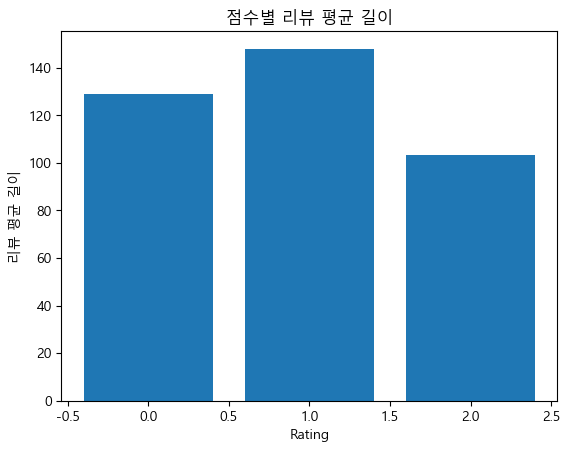

In [80]:
plt.bar(avg_len.index, avg_len.values)
plt.xlabel('Rating')
plt.ylabel('리뷰 평균 길이')
plt.title('점수별 리뷰 평균 길이')
plt.show()

Q2. 평점에 따라 리뷰에서 자주 등장하는 단어를 분석해보세요

1. 리뷰데이터를 전처리하고 자유로운 방법으로 토큰화를 수행해보세요
2. 토큰화된 단어들의 빈도수를 계산하고 가장 많이 등장한 단어들을 bar그래프로 시각화해보세요

In [81]:
def extract_nouns(text):
    return m.nouns(text)

In [83]:
restaurants['Nouns'] = restaurants['Review'].apply(extract_nouns)
restaurants

,Rating,Review,Length,Nouns
124388,1,삼겹만 먹다가 목살 먹었어요 냉면에 역시 저기압일 땐 고기 앞으로 가야쥬 잘 먹...,50,"[삼, 겹, 목살, 냉면, 저기압, 땐, 고기, 앞]"
633594,2,가볼만해요 맛있더라고요,12,[만]
393430,0,새로 생겨서 가봤는데 생각보다는 별로였네요 라테 종류는 맛있었는데 아메리카노는 산...,358,"[생각, 라테, 종류, 아메리카노, 산미, 맛, 느낌, 슈페너, 크림, 크림, 불편..."
547587,1,사람들이 너무 많아서 주변 분위기가 너무 시끄러웠다.. 이야기를 하기 위해서는 목청...,70,"[사람, 주변, 분위기, 이야기, 목청, 음식점, 분위기]"
125026,1,밑에 뚜아앙 정신 차려라 세종에서 이 정도면 서비스 맛 다 좋은 편이다,39,"[밑, 정신, 세종, 정도, 서비스, 맛, 편]"
...,...,...,...,...
216066,1,음료와 디저트가 좀 비싸고 카페 가는 길이 좀 힘들긴 해요 그래도 그게 잊힐 만큼 ...,85,"[음료, 디저트, 카페, 길, 그게, 만큼, 인테리어, 식물, 조합, 봄, 추천]"
166832,1,건강빵에 눈을 뜬 곳 건강빵도 맛있다는 걸 알게 됐어요 다른 빵보다 건강빵 등...,52,"[건강, 빵, 눈, 곳, 건강, 빵, 걸, 빵, 건강, 빵, 등]"
369894,1,600번째 리뷰는 늦었지만 화이트데이 기념으로 방문한 테이블 포포! Popo가 아니...,1182,"[번, 리뷰, 화이트데이, 기념, 방문, 테이블, 포포, 런, 코스, 메뉴, 가격,..."
179061,0,양도 별로고 맛도 없고 원수 친구가 간다 해도 말릴 거 같아요. 그리고 컵이 약간 ...,61,"[양, 맛, 원수, 친구, 거, 컵, 기분]"


In [84]:
all_nouns = []
for nouns_list in restaurants['Nouns']:
    all_nouns.extend(nouns_list)

In [85]:
all_nouns

['삼',
 '겹',
 '목살',
 '냉면',
 '저기압',
 '땐',
 '고기',
 '앞',
 '만',
 '생각',
 '라테',
 '종류',
 '아메리카노',
 '산미',
 '맛',
 '느낌',
 '슈페너',
 '크림',
 '크림',
 '불편',
 '베이커리',
 '가게',
 '카운터',
 '앞',
 '진열',
 '데',
 '위생',
 '초코',
 '쿠키',
 '지',
 '것',
 '느낌',
 '당황',
 '투명',
 '케이스',
 '것',
 '실내',
 '음악',
 '소리',
 '전반',
 '외관',
 '치중',
 '것',
 '사람',
 '주변',
 '분위기',
 '이야기',
 '목청',
 '음식점',
 '분위기',
 '밑',
 '정신',
 '세종',
 '정도',
 '서비스',
 '맛',
 '편',
 '회기역',
 '근처',
 '족발',
 '보쌈',
 '맛',
 '집',
 '시',
 '손님',
 '족발',
 '보쌈',
 '보쌈',
 '중',
 '사이즈',
 '고기',
 '거',
 '보쌈김치',
 '위',
 '양념',
 '집',
 '점수',
 '듯',
 '김치',
 '깍',
 '둑',
 '생고구마',
 '무',
 '말',
 '형태',
 '배',
 '양념',
 '테이블',
 '여기저기',
 '보쌈김치',
 '추가',
 '주문',
 '보쌈',
 '김치',
 '중요',
 '치즈',
 '애자',
 '환장',
 '만',
 '곳',
 '핵',
 '존',
 '맛',
 '탱',
 '집',
 '여기',
 '데',
 '곱창',
 '막창',
 '맛',
 '추천',
 '가격',
 '바람',
 '성북동',
 '위치',
 '알렉스',
 '커피',
 '랩',
 '분점',
 '건축',
 '사무소',
 '운영',
 '듯',
 '카페',
 '정원',
 '곳',
 '플랫',
 '화이트',
 '메뉴',
 '추천',
 '라테',
 '아이스',
 '아메리카노',
 '초코',
 '퍼지',
 '주문',
 '이곳',
 '커피',
 '주',
 '무기',
 '듯',
 '우유',
 '커피',
 '고소',
 

In [86]:
word_freq = {}
for noun in all_nouns:
    if noun in word_freq:
        word_freq[noun] += 1
    else:
        word_freq[noun] = 1

In [87]:
word_freq

{'삼': 16,
 '겹': 10,
 '목살': 4,
 '냉면': 21,
 '저기압': 1,
 '땐': 11,
 '고기': 106,
 '앞': 31,
 '만': 90,
 '생각': 113,
 '라테': 20,
 '종류': 35,
 '아메리카노': 12,
 '산미': 7,
 '맛': 572,
 '느낌': 68,
 '슈페너': 7,
 '크림': 40,
 '불편': 19,
 '베이커리': 8,
 '가게': 57,
 '카운터': 8,
 '진열': 1,
 '데': 59,
 '위생': 10,
 '초코': 17,
 '쿠키': 2,
 '지': 4,
 '것': 277,
 '당황': 7,
 '투명': 1,
 '케이스': 2,
 '실내': 6,
 '음악': 4,
 '소리': 8,
 '전반': 12,
 '외관': 10,
 '치중': 1,
 '사람': 93,
 '주변': 9,
 '분위기': 133,
 '이야기': 3,
 '목청': 1,
 '음식점': 15,
 '밑': 7,
 '정신': 2,
 '세종': 1,
 '정도': 92,
 '서비스': 59,
 '편': 95,
 '회기역': 2,
 '근처': 41,
 '족발': 7,
 '보쌈': 9,
 '집': 231,
 '시': 40,
 '손님': 14,
 '중': 65,
 '사이즈': 7,
 '거': 160,
 '보쌈김치': 2,
 '위': 25,
 '양념': 34,
 '점수': 2,
 '듯': 108,
 '김치': 23,
 '깍': 2,
 '둑': 2,
 '생고구마': 1,
 '무': 4,
 '말': 41,
 '형태': 2,
 '배': 20,
 '테이블': 41,
 '여기저기': 3,
 '추가': 29,
 '주문': 94,
 '중요': 5,
 '치즈': 45,
 '애자': 1,
 '환장': 1,
 '곳': 209,
 '핵': 3,
 '존': 25,
 '탱': 10,
 '여기': 89,
 '곱창': 14,
 '막창': 9,
 '추천': 101,
 '가격': 145,
 '바람': 4,
 '성북동': 2,
 '위치': 28,
 '알렉스': 1,

In [88]:
freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

In [90]:
freq_df = freq_df.sort_values(by = 'Frequency', ascending=False).head(20)
freq_df

,Word,Frequency
14,맛,572
28,것,277
54,집,231
81,곳,209
147,수,206
59,거,160
104,메뉴,151
186,음식,148
89,가격,145
40,분위기,133


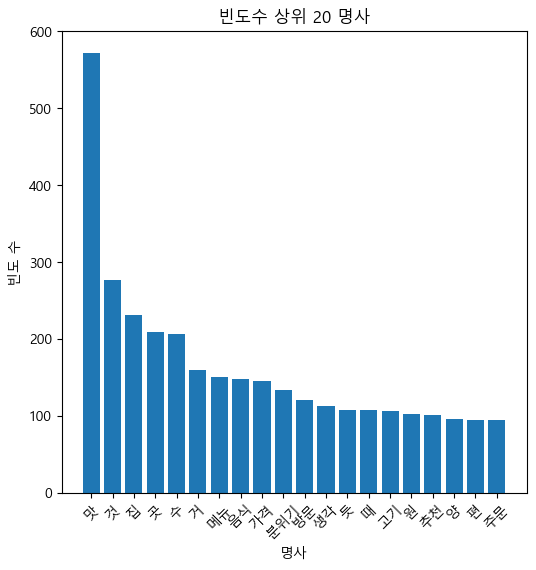

In [93]:
plt.figure(figsize = (6, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'])
plt.xlabel('명사')
plt.ylabel('빈도 수')
plt.title('빈도수 상위 20 명사')
plt.xticks(rotation = 45)
plt.show()

In [94]:
all_nouns

['삼',
 '겹',
 '목살',
 '냉면',
 '저기압',
 '땐',
 '고기',
 '앞',
 '만',
 '생각',
 '라테',
 '종류',
 '아메리카노',
 '산미',
 '맛',
 '느낌',
 '슈페너',
 '크림',
 '크림',
 '불편',
 '베이커리',
 '가게',
 '카운터',
 '앞',
 '진열',
 '데',
 '위생',
 '초코',
 '쿠키',
 '지',
 '것',
 '느낌',
 '당황',
 '투명',
 '케이스',
 '것',
 '실내',
 '음악',
 '소리',
 '전반',
 '외관',
 '치중',
 '것',
 '사람',
 '주변',
 '분위기',
 '이야기',
 '목청',
 '음식점',
 '분위기',
 '밑',
 '정신',
 '세종',
 '정도',
 '서비스',
 '맛',
 '편',
 '회기역',
 '근처',
 '족발',
 '보쌈',
 '맛',
 '집',
 '시',
 '손님',
 '족발',
 '보쌈',
 '보쌈',
 '중',
 '사이즈',
 '고기',
 '거',
 '보쌈김치',
 '위',
 '양념',
 '집',
 '점수',
 '듯',
 '김치',
 '깍',
 '둑',
 '생고구마',
 '무',
 '말',
 '형태',
 '배',
 '양념',
 '테이블',
 '여기저기',
 '보쌈김치',
 '추가',
 '주문',
 '보쌈',
 '김치',
 '중요',
 '치즈',
 '애자',
 '환장',
 '만',
 '곳',
 '핵',
 '존',
 '맛',
 '탱',
 '집',
 '여기',
 '데',
 '곱창',
 '막창',
 '맛',
 '추천',
 '가격',
 '바람',
 '성북동',
 '위치',
 '알렉스',
 '커피',
 '랩',
 '분점',
 '건축',
 '사무소',
 '운영',
 '듯',
 '카페',
 '정원',
 '곳',
 '플랫',
 '화이트',
 '메뉴',
 '추천',
 '라테',
 '아이스',
 '아메리카노',
 '초코',
 '퍼지',
 '주문',
 '이곳',
 '커피',
 '주',
 '무기',
 '듯',
 '우유',
 '커피',
 '고소',
 

In [96]:
# pip install wordcloud

In [97]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [98]:
word_string = ', '.join(all_nouns)
word_string

'삼, 겹, 목살, 냉면, 저기압, 땐, 고기, 앞, 만, 생각, 라테, 종류, 아메리카노, 산미, 맛, 느낌, 슈페너, 크림, 크림, 불편, 베이커리, 가게, 카운터, 앞, 진열, 데, 위생, 초코, 쿠키, 지, 것, 느낌, 당황, 투명, 케이스, 것, 실내, 음악, 소리, 전반, 외관, 치중, 것, 사람, 주변, 분위기, 이야기, 목청, 음식점, 분위기, 밑, 정신, 세종, 정도, 서비스, 맛, 편, 회기역, 근처, 족발, 보쌈, 맛, 집, 시, 손님, 족발, 보쌈, 보쌈, 중, 사이즈, 고기, 거, 보쌈김치, 위, 양념, 집, 점수, 듯, 김치, 깍, 둑, 생고구마, 무, 말, 형태, 배, 양념, 테이블, 여기저기, 보쌈김치, 추가, 주문, 보쌈, 김치, 중요, 치즈, 애자, 환장, 만, 곳, 핵, 존, 맛, 탱, 집, 여기, 데, 곱창, 막창, 맛, 추천, 가격, 바람, 성북동, 위치, 알렉스, 커피, 랩, 분점, 건축, 사무소, 운영, 듯, 카페, 정원, 곳, 플랫, 화이트, 메뉴, 추천, 라테, 아이스, 아메리카노, 초코, 퍼지, 주문, 이곳, 커피, 주, 무기, 듯, 우유, 커피, 고소, 라테, 감, 초코, 마시멜로, 오븐, 아이스크림, 부족, 당, 충전, 양, 입가심, 정도, 정원, 모기, 실내, 것, 운치, 카페, 직원, 친절, 발레, 분, 불친절, 역, 것, 신발, 신고, 북동, 산책, 카페, 방문, 것, 최고, 집, 가격, 메뉴, 말, 짱, 집, 라멘, 가게, 문, 오랜만, 버터, 핑거, 게, 냄새, 메이플, 시럽, 꿀맛, 맥주, 수, 분위기, 안주, 추천, 저, 집, 제주, 때, 집, 제주도, 년, 번, 가요, 단점, 통화, 통, 정도, 통, 이상, 시도, 거우, 연결, 오늘, 예약, 시간, 도착, 중, 손, 개, 주문, 뭘, 생일날, 저녁, 예약, 전화, 통, 문, 식당, 운영, 태도, 최악, 예약, 사정, 연락, 게, 정상, 마을, 바퀴, 소리, 리뷰, 플, 리뷰, 거, 삭제, 맛, 개, 존, 맛, 눈, 맛, 맛, 거, 여기, 맥주, 

In [99]:
font_path = 'C:/Users/RMARKET/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.otf'

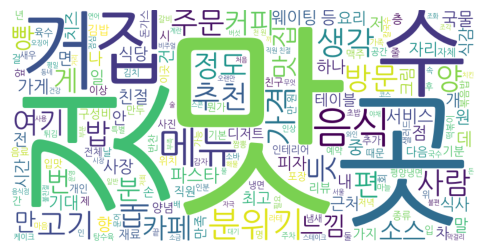

In [100]:
wordcolud = WordCloud(font_path = font_path, width=800, height=400, background_color='white').generate(word_string)
plt.figure(figsize = (6, 6))
plt.imshow(wordcolud)
plt.axis('off')
plt.show()